In [1]:
"""
Generates data for training
"""
import numpy as np

from qutip.visualization import plot_wigner, hinton, plot_fock_distribution
from qutip import Qobj
from qutip.wigner import qfunc, wigner
from qutip.states import thermal_dm
from qutip.random_objects import rand_dm

from ops import cat, binomial, num, gkp
import numpy as np
from qutip import coherent_dm, destroy, mesolve, Options, fock_dm, coherent, expect, fidelity
from qutip.visualization import plot_wigner_fock_distribution
from qutip.wigner import qfunc


import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from ops import cat, add_state_noise, generalized_q, visualize
from ops import expect as tf_expect
from ops import (random_alpha, dm_to_tf, husimi_ops, tf_to_dm, clean_cholesky, density_matrix_from_T,
                 batched_expect, convert_to_real_ops, convert_to_complex_ops)

from ops import cat, binomial, num, gkp
from qst_cgan.models import Generator, Discriminator


from photon_loss import add_photon_noise

import h5py

from skimage.util import random_noise
from skimage import transform
from skimage.filters import gaussian


from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import colors

import pickle

import os
import glob

from qst_cgan.utils import plot_three_husimi, plot_fock

from qulearn.utils import (plot_fock, plot_three_husimi, plot_three_fock, extend_array, get_mean_std_array,
                           plot_all_fidelities)

from scipy.io import loadmat
%load_ext autoreload
%autoreload 2

In [2]:
tf.keras.backend.set_floatx('float64')

In [3]:


# class Fontsizes10:
#     tiny = 5
#     scriptsize = 7
#     footnotesize = 8
#     small = 9
#     normalsize = 10
#     large = 12
#     Large = 14
#     LARGE = 17
#     huge = 20
#     Huge = 25


# class Fontsizes11:
#     tiny = 6
#     scriptsize = 8
#     footnotesize = 9
#     small = 10
#     normalsize = 11
#     large = 12
#     Large = 14
#     LARGE = 17
#     huge = 20
#     Huge = 25


# class Fontsizes12:
#     tiny = 6
#     scriptsize = 8
#     footnotesize = 10
#     small = 11
#     normalsize = 12
#     large = 14
#     Large = 17
#     LARGE = 20
#     huge = 25
#     Huge = 25


# _widths = {
#     "onecolumn": 7.08,
#     "twocolumn": 3.42,
# }

# _fontsizes = {
#     10: Fontsizes10,
#     11: Fontsizes12,
#     12: Fontsizes12,
# }

# width = _widths["twocolumn"]
# wide_width = _widths["onecolumn"]

# fontsizes = _fontsizes[10]

# mpl.use("pgf")
# mpl.style.use("seaborn-white")

# plt.rcParams["axes.labelsize"] = fontsizes.small
# plt.rcParams["axes.titlesize"] = fontsizes.large
# plt.rcParams["xtick.labelsize"] = fontsizes.footnotesize
# plt.rcParams["ytick.labelsize"] = fontsizes.footnotesize
# plt.rcParams["font.size"] = fontsizes.small


# plt.rcParams["pgf.texsystem"] = "pdflatex"
# plt.rcParams["font.family"] = "serif"
# # plt.rcParams["text.usetex"] = False
# plt.rcParams["pgf.rcfonts"] = True

# plt.rcParams["xtick.major.width"] = 0.2
# plt.rcParams["ytick.major.width"] = 0.2
# plt.rcParams["xtick.direction"] = "in"
# plt.rcParams["ytick.direction"] = "in"
# plt.rcParams["xtick.major.size"] = 4
# plt.rcParams["ytick.major.size"] = 4
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["axes.linewidth"] = 0.5
# plt.rcParams["axes.labelpad"] = 1
# plt.rcParams["grid.linewidth"] = 0.5
# plt.rcParams["lines.markersize"] = 3

# plt.rcParams["legend.frameon"] = False
# plt.rcParams["legend.framealpha"] = 1.0
# plt.rcParams["legend.fancybox"] = False

# plt.rcParams["legend.fontsize"] = fontsizes.tiny
# plt.rcParams["legend.handlelength"] = 1


# fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
# inches_per_pt = 1.0/72.27               # Convert pt to inches
# golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
# fig_width = fig_width_pt*inches_per_pt  # width in inches
# fig_height =fig_width*golden_mean       # height in inches
# fig_size = [fig_width,fig_height]
# params = {          'font.size' : 10,
#           'axes.labelsize' : 10,
#           'font.size' : 10,
#           'font.size' : 10,
#           'legend.fontsize': 10,
#           'xtick.labelsize' : 8,
#           'ytick.labelsize' : 8,

#     #'backend': 'ps',
#           'text.usetex': False,
#           'figure.figsize': fig_size,
#     'ytick.minor.pad': -0.5,
#     'ytick.minor.pad': -0.5,
    
#     'ytick.major.size'     : 1,
#     'ytick.minor.size'     : 1,
#     'ytick.major.width'    : .5,
#     'ytick.minor.width'    : .5,
    
#     'xtick.major.size'     : 1,
#     'xtick.minor.size'     : 1,
#     'xtick.major.width'    : .5,
#     'xtick.minor.width'    : .5,
    
#     'xtick.major.pad': 1.5,
#     'xtick.minor.pad': 1.5, }

fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = {# 'backend': 'ps',
          'axes.labelsize': 8,
          'font.size': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'axes.labelpad': 1,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

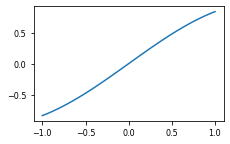

In [4]:
plt.plot(np.linspace(-1, 1, 100), np.sin(np.linspace(-1, 1, 100)))

In [5]:
hilbert_size = 32


# Betas can be selected in a grid or randomly in a circle
num_grid = 32
num_points = num_grid*num_grid
beta_max_x = 5
beta_max_y = 5

xvec = np.linspace(-beta_max_x, beta_max_x, num_grid)
yvec = np.linspace(-beta_max_y, beta_max_y, num_grid)

X, Y = np.meshgrid(xvec, yvec)
betas = (X + 1j*Y).ravel()

In [6]:
cmap = "hot"

In [7]:
sigma = 0
def read_file(path):
    """
    Reads a file
    """
    flist = None
    with open(path, 'rb') as f:
        flist = pickle.load(f)
    return flist

datapath = "reconstruction/scripts/data/reconstructions/binomial/gaussian-sigma-0.015030995770693008/"
# datapath = "reconstruction/scripts/data/arxiv/reconstructions/binomial-2-4-0/additive-gaussian-noise-0.05-momentum-0.5-lr-0.0002/"

fnames = glob.glob(datapath+"/*")
keys = [name.split(datapath)[1] for name in fnames if "fidelities" in name]
fdict = {}

In [8]:
for key in keys:
    path = datapath + key
    fdict[key] = read_file(path)[:30]

In [9]:
fdict.keys()

dict_keys(['fidelities-gan_l1_10', 'fidelities-imle', 'fidelities-gan_l1_0', 'fidelities-cross-entropy', 'fidelities-KL', 'fidelities-L1', 'fidelities-L2', 'fidelities-gan_l1_1', 'fidelities-gan_l1_100'])

In [10]:
for key in fdict.keys():
    print("key", key, len(fdict[key]))

key fidelities-gan_l1_10 30
key fidelities-imle 30
key fidelities-gan_l1_0 30
key fidelities-cross-entropy 30
key fidelities-KL 30
key fidelities-L1 30
key fidelities-L2 30
key fidelities-gan_l1_1 30
key fidelities-gan_l1_100 30


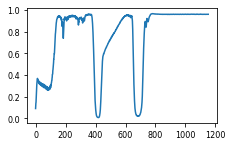

In [11]:
plt.plot(fdict['fidelities-gan_l1_10'][0])

In [12]:
def extend_array(flist, max_iter=None):
    """
    Extends the array with repeating the last element
    """
    if max_iter == None:
        max_iter = np.max([len(f) for f in flist])

    arr = np.zeros((len(flist), max_iter))

    for i in range(len(flist)):
        last_element = flist[i][-1]
        length_flist = len(flist[i])

        arr[i][:length_flist] = flist[i]
        arr[i][length_flist:] = last_element

    return arr

In [13]:
def get_mean_std_array(arr):
    """
    Obtains the mean of an array over second axis
    """
    return np.mean(arr, axis=0), np.std(arr, axis=0)

In [14]:
fnames = ["imle", "cross_entropy", "L1", "L2", "KL",
          "gan_no_l1", "gan_l1_1", "gan_l1_10", "gan_l1_100"]

In [15]:
fnames

['imle',
 'cross_entropy',
 'L1',
 'L2',
 'KL',
 'gan_no_l1',
 'gan_l1_1',
 'gan_l1_10',
 'gan_l1_100']

In [16]:
labels={'fidelities-gan_l1_10': r'$\lambda_{\mathrm{L1}} = 10$',
        'fidelities-imle': "iMLE",
        'fidelities-gan_l1_0': r'$\lambda_{\mathrm{L1}} = 0$',
        'fidelities-cross-entropy': "Cross entropy",
        'fidelities-KL': "KL Divergence",
        'fidelities-L1': r"L1",
        'fidelities-L2': r"L2",
        'fidelities-gan_l1_1': r'$\lambda_{\mathrm{L1}} = 1$',
        'fidelities-gan_l1_100': r'$\lambda_{\mathrm{L1}} = 100$'}

color_dict = {'fidelities-gan_l1_10': 'r',
        'fidelities-iMLE': 'b',
        'fidelities-imle': 'b',
        'fidelities-gan_l1_0': "k",
        'fidelities-cross-entropy': "darkviolet",
        'fidelities-KL': "orange",
        'fidelities-L1':"darkgreen",
        'fidelities-L2':  "deeppink",
        'fidelities-gan_l1_1': "teal",
        'fidelities-gan_l1_100': "brown"}

fidelities-gan_l1_10


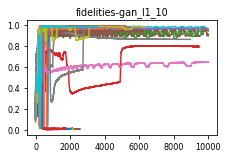

fidelities-imle


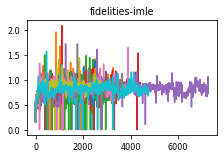

fidelities-gan_l1_0


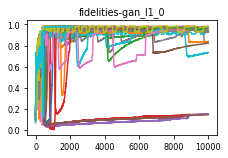

fidelities-cross-entropy


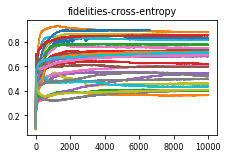

fidelities-KL


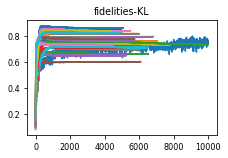

fidelities-L1


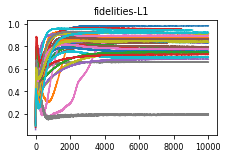

fidelities-L2


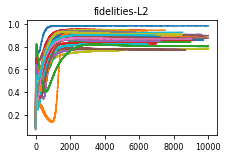

fidelities-gan_l1_1


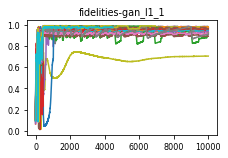

fidelities-gan_l1_100


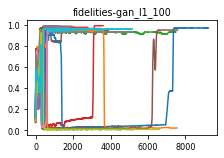

In [17]:
for key in keys:
    # key = keys[idx]
    plt.figure(figsize=(fig_width, fig_height))
    print(key)
    for i in range(len(fdict[key])):
        plt.plot(fdict[key][i])
    plt.title("{}".format(key))
    plt.show()

In [18]:
fnames = glob.glob(datapath+"/*")
keys_state = [name.split(datapath)[1] for name in fnames if "states" in name]
states_dict = {}

for key in keys_state:
    path = datapath + key
    states_dict[key] = read_file(path)

# for key in keys_state:
#     rho_reconstructed = Qobj(states_dict[key][0][-1])
#     plot_wigner_fock_distribution(rho_reconstructed)
#     plt.suptitle("Loss {}".format(key))
#     plt.show()

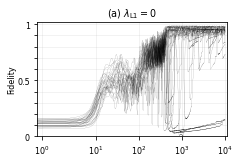

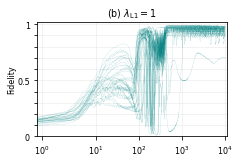

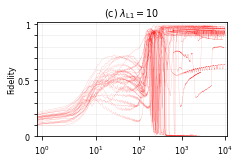

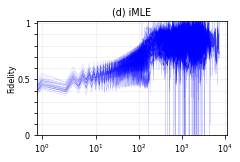

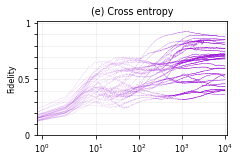

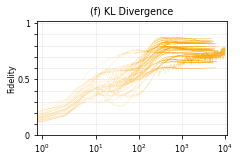

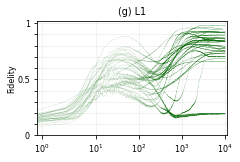

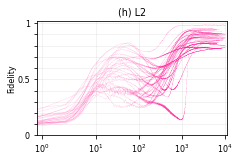

In [19]:
keys = ['fidelities-gan_l1_0', 'fidelities-gan_l1_1', 'fidelities-gan_l1_10',
        'fidelities-imle',
        'fidelities-cross-entropy', 'fidelities-KL', 'fidelities-L1',
        'fidelities-L2']

letters = ["a", "b", "c",
           "d",
           "e", "f", "g", "h", "i"]
figpath = "figures/"

iterations = 0
for key in keys:
    # key = keys[idx]
    plt.figure(figsize=(fig_width, fig_height))
    for i in range(len(fdict[key])):
        plt.plot(fdict[key][i], c=color_dict[key], alpha=0.8, linewidth=0.1)
    plt.gca().set_xscale('symlog')
    plt.gca().set_xlim([0.8, 11000])

    ax1 = plt.gca()
    ax1.set_ylabel("Fidelity")
    # ax1.set_xlabel("Iterations")
    ax1.set_ylim([0, 1.02])

    ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.])
    ax1.set_yticklabels([0, "", "", "", "", "0.5", "", "", "", "", 1])

    ax1.set_xscale('symlog')
    ax1.set_xlim([0.8, 11000])

    ax1.grid(which='minor', alpha=0.2)
    ax1.grid(which='major', alpha=0.2)
    plt.title("({}) ".format(letters[iterations])+labels[key])
    iterations += 1
    plt.show()
    # plt.savefig(figpath+"fig-13-binomial-gaussian-{}.pdf".format(key),
    #                     bbox_inches = "tight", pad_inches=0.001)
#     plt.close()

/home/shahnawaz/tomography/qulearn/qulearn/utils.py:566: RuntimeWarning: Mean of empty slice
  return np.nanmean(arr, axis=0), np.nanstd(arr, axis=0)
/home/shahnawaz/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


(<Figure size 245.081x151.468 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe0956dd150>)

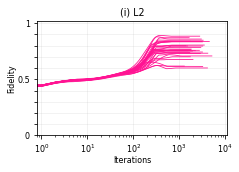

In [20]:
pgd = loadmat("reconstruction/scripts/data/reconstructions/binomial/matlab-comparisions/binomial_reconstructed_noisy.mat")
pgd = pgd["fmatrix"]
x = np.arange(0, 10001, 1)
plot_all_fidelities(pgd, x=x, color=color_dict[key], title="("+letters[iterations]+") "+labels[key])

In [31]:
fvals_pgd = []

for l in pgd:
    fvals_pgd.append(l[~np.isnan(l)][-1])
np.mean(fvals_pgd), np.std(fvals_pgd)

(0.7660606056744608, 0.07234530134987313)

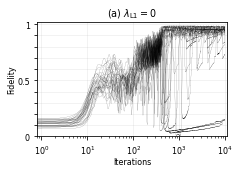

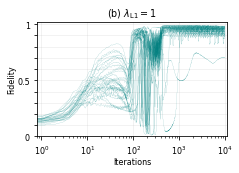

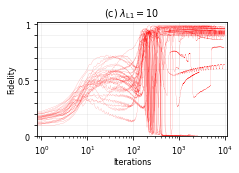

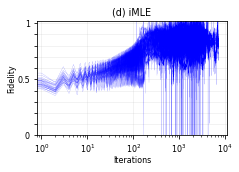

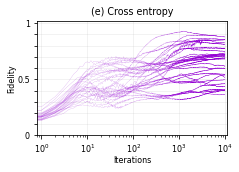

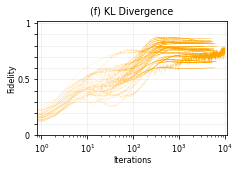

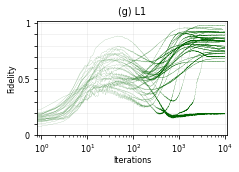

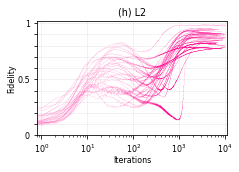

In [110]:
iterations = 0
x = np.arange(0, 10000, 1)
for key in keys:
    plot_all_fidelities(fdict[key], x=x, color=color_dict[key], title="("+letters[iterations]+") "+labels[key])
    iterations += 1
    plt.savefig(figpath+"fig-14-binomial-gaussian-{}.pdf".format(key),
                         bbox_inches = "tight", pad_inches=0.001)

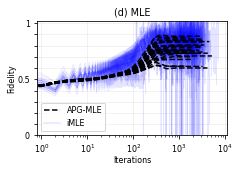

In [122]:
alpha = 0.1
key = 'fidelities-imle'
iterations = 3
fig, ax = plot_all_fidelities(fdict[key],
                              x=x,
                              alpha= alpha,
                              color=color_dict[key],
                              title="("+letters[iterations]+") "+"MLE")
for i in range(len(pgd) - 1):
    ax.plot(x, pgd[i, :], "--", color="black")

    
ax.plot(x, pgd[-1, :], "--", color="black", label="APG-MLE")
ax.plot(fdict[key][-1], color=color_dict[key], label="iMLE",
                                     alpha= alpha)

ax.legend(loc="lower left")
# iterations += 1
plt.savefig(figpath+"fig-14-binomial-gaussian-{}.pdf".format("MLE"),
                     bbox_inches = "tight", pad_inches=0.001)

In [56]:
iterations = 0
x = np.arange(0, 10001, 1)
for key in keys:    
    fidelities = []
    
    for i in fdict[key]:
        if i[-1] < 0.1:
            print(key)
            continue
        fidelities.append(i[-1])

    print(key, len(fidelities), np.mean(fidelities), np.std(fidelities))

fidelities-gan_l1_0 30 0.8582025051447599 0.24312535829759527
fidelities-gan_l1_1 30 0.950035976252654 0.051784710129264874
fidelities-gan_l1_10
fidelities-gan_l1_10
fidelities-gan_l1_10
fidelities-gan_l1_10
fidelities-gan_l1_10
fidelities-gan_l1_10
fidelities-gan_l1_10
fidelities-gan_l1_10 23 0.9369268381165853 0.07726580349571059
fidelities-imle 30 0.845272968874286 0.07595961699807116
fidelities-cross-entropy 30 0.6514581241187775 0.15918262720769383
fidelities-KL 30 0.7638650840873368 0.06058932694348612
fidelities-L1 30 0.8100433813294081 0.14146068359731656
fidelities-L2 30 0.8751474182842978 0.05657934711436087


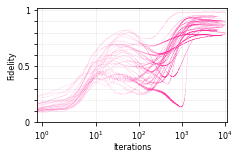

In [57]:
plt.figure(figsize=(fig_width, fig_height))
for i in range(len(fdict[key])):
    plt.plot(fdict[key][i], c=color_dict[key], alpha=0.8, linewidth=0.1)
plt.gca().set_xscale('symlog')
plt.gca().set_xlim([0.8, 11000])

ax1 = plt.gca()
ax1.set_ylabel("Fidelity")
ax1.set_xlabel("Iterations")
ax1.set_ylim([0, 1.02])

ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.])
ax1.set_yticklabels([0, "", "", "", "", "0.5", "", "", "", "", 1])

ax1.set_xscale('symlog')
ax1.set_xlim([0.8, 11000])

ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.2)

iterations += 1
# plt.show()
# plt.savefig(figpath+"fig-13-binomial-gaussian-label.pdf".format(key),
#                     bbox_inches = "tight", pad_inches=0.001)

# CGAN

In [ ]:
# datapath = "reconstruction/scripts/data/reconstructions/cat/losses/"

# fnames = glob.glob(datapath+"/*")
# keys = [name.split(datapath)[1] for name in fnames]
# print(fnames)

In [ ]:
figpath = "figures/"



lines = {}
x = np.arange(0, 10001)

for key in ['fidelities-L1', 'fidelities-L2']:
    fextended = extend_array(fdict[key])
    mean, std = get_mean_std_array(fextended)
    line, = plt.plot(x, mean, label = labels[key], c=color_dict[key])
    plt.fill_between(x, mean-std, mean+std, alpha=0.1, color=color_dict[key])
    lines[key] = line
    

l1 = plt.legend([lines['fidelities-L1'], lines['fidelities-L2']],
                [labels['fidelities-L1'], labels['fidelities-L2']],
                loc='upper right', bbox_to_anchor=(0.24, 1.03),
                frameon=False)

for key in ['fidelities-imle', 'fidelities-cross_entropy','fidelities-KL']:
    fextended = extend_array(fdict[key])
    mean, std = get_mean_std_array(fextended)
    line, = plt.plot(x, mean, label = labels[key], c=color_dict[key])
    plt.fill_between(x, mean-std, mean+std, color=color_dict[key], alpha=0.1)
    lines[key] = line

l2 = plt.legend([lines[key] for key in ['fidelities-imle', 'fidelities-cross_entropy','fidelities-KL']],
                [labels[key] for key in ['fidelities-imle', 'fidelities-cross_entropy','fidelities-KL']],
                frameon=False, ncol=1,
                loc='upper right', bbox_to_anchor=(1.01, 0.4))
plt.gca().add_artist(l1)

# plt.gca().add_artist(legends[1])

# l1 = 
# l2 = legend([p2], ["Graph2"], loc=4)
# gca().add_artist(l1)
    
# plt.legend(loc="lower right", ncol=2, frameon=False)
    
plt.gca().set_xscale('symlog')
ax1 = plt.gca()

In [ ]:
figpath = "figures/"
lines = {}

for key in ['fidelities-L1', 'fidelities-L2']:
    fextended = extend_array(fdict[key])
    mean, std = get_mean_std_array(fextended)
    x = np.arange(0, len(mean))
    line, = plt.plot(x, mean, label = labels[key], c=color_dict[key])
    plt.fill_between(x, mean-std, mean+std, alpha=0.1, color=color_dict[key])
    lines[key] = line
    

l1 = plt.legend([lines['fidelities-L1'], lines['fidelities-L2']],
                [labels['fidelities-L1'], labels['fidelities-L2']],
                loc='upper right', bbox_to_anchor=(0.24, 1.03),
                frameon=False)

for key in ['fidelities-imle', 'fidelities-cross_entropy','fidelities-KL']:
    fextended = extend_array(fdict[key])
    mean, std = get_mean_std_array(fextended)
    x = np.arange(0, len(mean))
    line, = plt.plot(x, mean, label = labels[key], c=color_dict[key])
    plt.fill_between(x, mean-std, mean+std, color=color_dict[key], alpha=0.1)
    lines[key] = line

l2 = plt.legend([lines[key] for key in ['fidelities-imle', 'fidelities-cross_entropy','fidelities-KL']],
                [labels[key] for key in ['fidelities-imle', 'fidelities-cross_entropy','fidelities-KL']],
                frameon=False, ncol=1,
                loc='upper right', bbox_to_anchor=(1.01, 0.4))
plt.gca().add_artist(l1)

# plt.gca().add_artist(legends[1])

# l1 = 
# l2 = legend([p2], ["Graph2"], loc=4)
# gca().add_artist(l1)
    
# plt.legend(loc="lower right", ncol=2, frameon=False)
plt.ylim(0, 1)
plt.gca().set_xscale('symlog')
ax1 = plt.gca()
ax1.set_ylabel("Fidelity")
ax1.set_xlabel("Iterations")
ax1.set_ylim([0, 1.02])
ax1.set_title("Standard loss")

ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.])
ax1.set_yticklabels([0, "", "", "", "", "0.5", "", "", "", "", 1])

ax1.set_xscale('symlog')
ax1.set_xlim([0.8, 11000])

ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.2)

# plt.show()
plt.savefig(figpath+"fig-10-other-loss-gaussian-binomial-with-noise.pdf", bbox_inches = "tight", pad_inches=0)

In [ ]:
figpath = "figures/"
x = np.arange(0, 10001)
lines = []

for key in ['fidelities-gan_l1_0', 'fidelities-gan_l1_1', 'fidelities-gan_l1_10', 'fidelities-gan_l1_100']:
    fextended = extend_array(fdict[key], max_iter=10001)
    mean, std = get_mean_std_array(fextended)
    plt.plot(x, mean, label = labels[key], c=color_dict[key])
    plt.fill_between(x, mean-std, mean+std, color=color_dict[key], alpha=0.1)

plt.legend(frameon=False, ncol=1,
           loc='upper left')


plt.gca().set_xscale('symlog')
ax1 = plt.gca()
ax1.set_title("QST-CGAN + L1 loss")
ax1.set_ylabel("Fidelity")
# ax1.set_xlabel("Iterations")
ax1.set_ylim([0, 1.02])

ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.])
ax1.set_yticklabels([0, "", "", "", "", "0.5", "", "", "", "", 1])

ax1.set_xscale('symlog')
ax1.set_xlim([0.8, 11000])

ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.2)
plt.savefig(figpath+"fig-10-gan-gaussian-binomial-with-noise.pdf", bbox_inches = "tight", pad_inches=0)

# Show the state

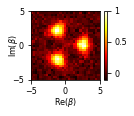

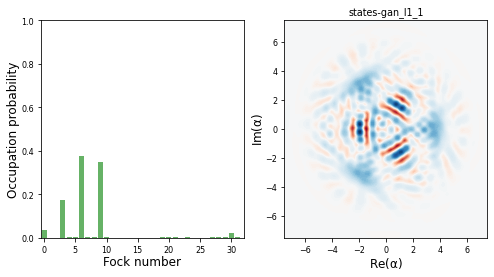

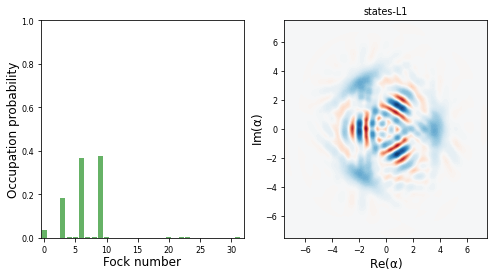

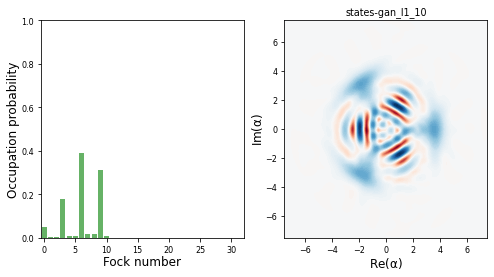

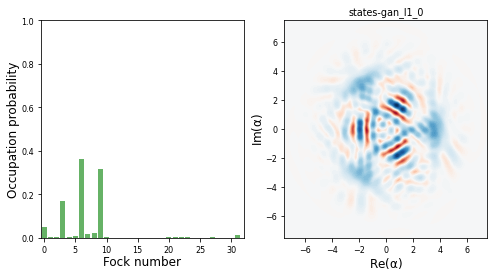

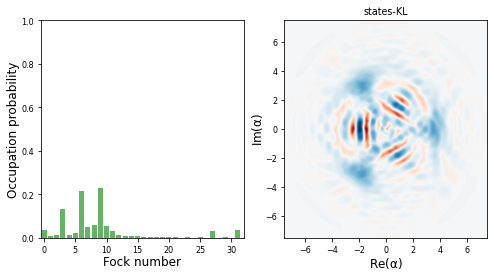

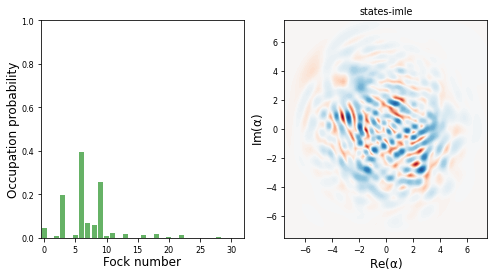

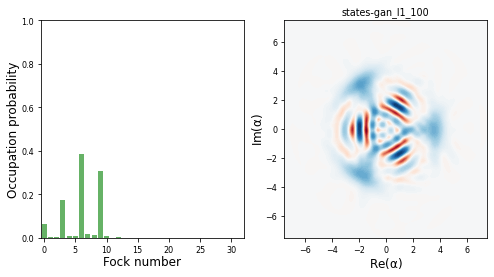

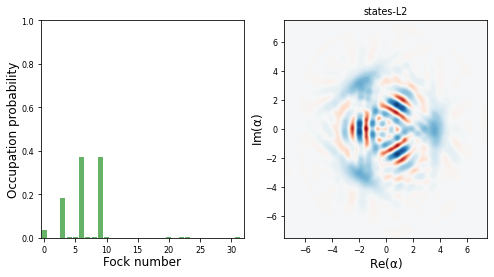

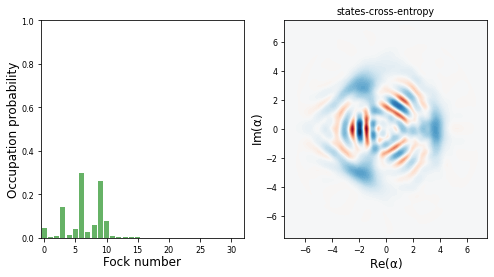

In [123]:
hilbert_size = 32


# Betas can be selected in a grid or randomly in a circle
num_grid = 32
num_points = num_grid*num_grid
beta_max_x = 5
beta_max_y = 5

xvec = np.linspace(-beta_max_x, beta_max_x, num_grid)
yvec = np.linspace(-beta_max_y, beta_max_y, num_grid)

X, Y = np.meshgrid(xvec, yvec)
betas = (X + 1j*Y).ravel()
ops = husimi_ops(hilbert_size, betas)
ops_batch = tf.convert_to_tensor([ops])

A = convert_to_real_ops(ops_batch)


rho, _ = binomial(hilbert_size, 2, 4, 0)

rho_tf = dm_to_tf([rho])
data = batched_expect(ops_batch, rho_tf)

x = data.numpy().reshape((num_grid, num_grid))

sigma = (0.05*tf.reduce_max(data))
x_noisy = tf.keras.layers.GaussianNoise(sigma)(x, training=True)

fig, ax = plt.subplots(1, 1, figsize=(2*fig_width/5, 2*fig_width/5))
im = ax.pcolor(xvec, yvec, x_noisy/tf.reduce_max(x_noisy), cmap="hot")
ax.set_aspect("equal")
ax.set_yticks([-5, 0, 5])
ax.set_xlabel(r"Re$(\beta)$", labelpad=0)
ax.set_ylabel(r"Im$(\beta)$", labelpad=-8)
cbar = plt.colorbar(im, fraction=0.046, ticks=[0, 0.5, 1])
cbar.ax.set_yticklabels(["0", "0.5", "1"])

# plt.show()
plt.savefig(figpath+"fig-10-binomial-data.pdf", bbox_inches = "tight", pad_inches=0)

labels={'states-gan_l1_10': r'$\lambda_{L1} = 10$',
        'states-iMLE': "iMLE",
        'states-imle': "iMLE",
        'states-gan_l1_0': r'$\lambda_{L1} = 0$',
        'states-cross-entropy': "Cross entropy",
        'states-KL': "KL Divergence",
        'states-L1': r"$L1$",
        'states-L2': r"$L2$",
        'states-gan_l1_1': r'$\lambda_{L1} = 1$',
        'states-gan_l1_100': r'$\lambda_{L1} = 100$'}

fnames = glob.glob(datapath+"/*")
keys = [name.split(datapath)[1] for name in fnames if "state" in name]
states_dict = {}

for key in keys:
    path = datapath + key
    states_dict[key] = read_file(path)

    
for key in keys:
    rho_reconstructed = Qobj(states_dict[key][0][-1])
    plot_wigner_fock_distribution(rho_reconstructed)
    plt.title(key)
    plt.show()

In [132]:
pgd_rhos = loadmat("reconstruction/scripts/data/reconstructions/binomial/matlab-comparisions/binomial_reconstructed_rhos.mat")
pgd_rhos = pgd_rhos["arr"].reshape((-1, 32, 32))

pgd_rhos.shape

(4208, 32, 32)

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f459abcfc90>,
       dtype=object))

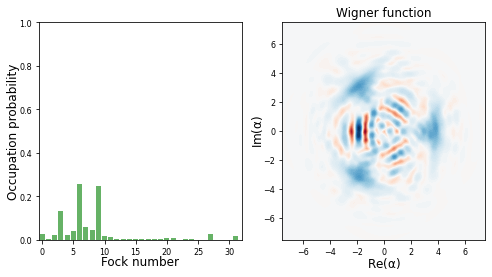

In [133]:
plot_wigner_fock_distribution(Qobj(pgd_rhos[-1]))

In [134]:
len(states_dict['states-imle'][0])

618

In [135]:
states_dict['states_apg_mle'] = [pgd_rhos]

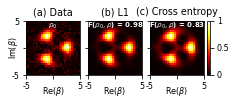

In [136]:
x = data.numpy().reshape((num_grid, num_grid))/tf.reduce_max(data)

sigma = 0.05
x_noisy = tf.keras.layers.GaussianNoise(sigma)(x, training=True)

xlist = [x_noisy.numpy().reshape((32, 32))]

states_list = [np.nan]

for key in ['states-L1', 'states-cross-entropy']:
    rho_reconstructed = Qobj(states_dict[key][0][-1])
    xlist.append(qfunc(rho_reconstructed, np.sqrt(2)*xvec, np.sqrt(2)*yvec))
    states_list.append(rho_reconstructed)
    
fig, axes = plot_three_husimi(*xlist, subtitles=["(a) Data", "(b) L1", "(c) Cross entropy"], cmap="hot")

ax = axes[0]
ax.text(0.5, 0.87, r"$\rho_0$", ha='center', fontweight="bold",
              transform=ax.transAxes, fontsize=7, color="w")

ax = axes[1]
ax.text(0.5, 0.87, r"F($\rho_0, \rho$) = {:.2f}".format(fidelity(rho, states_list[1])), ha='center',
              transform=ax.transAxes, fontsize=7, fontweight="bold", color="w")

ax = axes[2]
ax.text(0.5, 0.87, r"F($\rho_0, \rho$) = {:.2f}".format(fidelity(rho, states_list[2])), ha='center',
              transform=ax.transAxes, fontsize=7, color="w", fontweight="bold")
plt.savefig(figpath+"fig-12-abc-noisy-reconstruction.pdf", bbox_inches="tight", pad_inches=0.001)

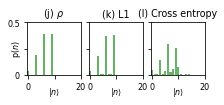

In [137]:
states_fock = [rho]
for key in ['states-L1', 'states-cross-entropy']:
    rho_reconstructed = Qobj(states_dict[key][0][-1])
    states_fock.append(rho_reconstructed)
    
titles = [r"(j) $\rho$", "(k) L1", "(l) Cross entropy"]
plot_three_fock(*states_fock, subtitles=titles)

plt.savefig(figpath+"fig-12-jkl-noisy-fock.pdf", bbox_inches="tight", pad_inches=0.001)

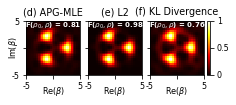

In [138]:
xlist = []
states_list = []
for key in ['states_apg_mle', 'states-L2', 'states-KL']:
    rho_reconstructed = Qobj(states_dict[key][0][-1])
    xlist.append(qfunc(rho_reconstructed, np.sqrt(2)*xvec, np.sqrt(2)*yvec))
    states_list.append(rho_reconstructed)
    
fig, axes = plot_three_husimi(*xlist, subtitles=["(d) APG-MLE", "(e) L2", "(f) KL Divergence"], cmap="hot")

for i in range(3):
    ax = axes[i]
    ax.text(0.5, 0.87, r"F($\rho_0, \rho$) = {:.2f}".format(fidelity(rho, states_list[i])),
            ha='center', fontweight="bold",
              transform=ax.transAxes, fontsize=7, color="w")


plt.savefig(figpath+"fig-12-def-noisy-reconstruction.pdf", bbox_inches="tight", pad_inches=0.001)

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4443e94090>,
       dtype=object))

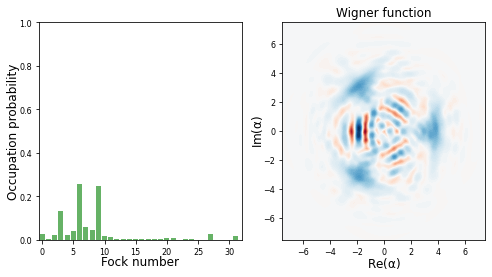

In [139]:
plot_wigner_fock_distribution(states_list[0])

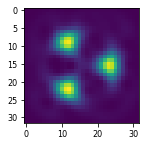

In [140]:
plt.imshow(qfunc(states_list[0], xvec, yvec, g=2))

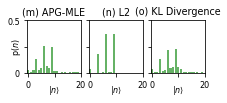

In [141]:
states_fock = []
for key in ['states_apg_mle', 'states-L2', 'states-KL']:
    rho_reconstructed = Qobj(states_dict[key][0][-1])
    states_fock.append(rho_reconstructed)
    
titles = [r"(m) APG-MLE", "(n) L2", "(o) KL Divergence"]
plot_three_fock(*states_fock, subtitles=titles)
plt.savefig(figpath+"fig-12-mno-noisy-fock.pdf", bbox_inches="tight", pad_inches=0.001)

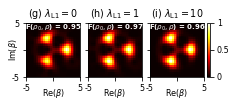

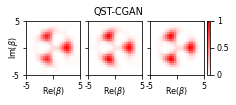

In [142]:
xlist = []
states_list = []
for key in ['states-gan_l1_0', 'states-gan_l1_1', 'states-gan_l1_10']:
    rho_reconstructed = Qobj(states_dict[key][0][-1])

    xlist.append(qfunc(rho_reconstructed, np.sqrt(2)*xvec, np.sqrt(2)*yvec))
    states_list.append(rho_reconstructed)
    
fig, axes = plot_three_husimi(*xlist, subtitles=[r"(g) $\lambda_{\mathrm {L1}} = 0$",
                                                 "(h) $\lambda_{\mathrm {L1}} = 1$",
                                                 "(i) $\lambda_{\mathrm {L1}} = 10$"],
                             cmap="hot")


for i in range(3):
    ax = axes[i]
    ax.text(0.5, 0.88, r"F($\rho_0, \rho$) = {:.2f}".format(fidelity(rho, states_list[i])),
                        ha='center', fontweight="bold",
              transform=ax.transAxes, fontsize=7, color="w")


    
plt.savefig(figpath+"fig-12-ghi-noisy-reconstruction.pdf", bbox_inches="tight", pad_inches=0.001)


plot_three_husimi(*xlist, title="QST-CGAN")
plt.savefig(figpath+"fig-12-ghi-noisy-reconstruction-title.pdf", bbox_inches="tight", pad_inches=0.001)

# Plotting Fock numbers

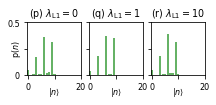

In [79]:
states_fock = []
for key in ['states-gan_l1_0', 'states-gan_l1_1', 'states-gan_l1_10']:
    rho_reconstructed = Qobj(states_dict[key][0][-1])
    states_fock.append(rho_reconstructed)
    
titles = [r"(p) $\lambda_{\mathrm {L1}} = 0$", "(q) $\lambda_{\mathrm {L1}} = 1$", "(r) $\lambda_{\mathrm {L1}} = 10$"]
plot_three_fock(*states_fock, subtitles=titles)
plt.savefig(figpath+"fig-12-pqr-noisy-fock.pdf", bbox_inches="tight", pad_inches=0.001)

In [81]:
labels['states_apg_mle'] = 'APG-MLE'

0.9999999999999999


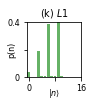

1.0000000000000004


<Figure size 245.081x151.468 with 0 Axes>

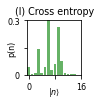

1.0000000000000004


<Figure size 245.081x151.468 with 0 Axes>

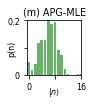

1.0


<Figure size 245.081x151.468 with 0 Axes>

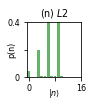

0.9999999999999998


<Figure size 245.081x151.468 with 0 Axes>

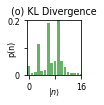

<Figure size 245.081x151.468 with 0 Axes>

In [82]:
for letter, key in zip(["k", "l", "m", "n", "o"],
                       ['states-L1', 'states-cross-entropy', 'states_apg_mle', 'states-L2', 'states-KL']):
    rho_reconstructed = Qobj(states_dict[key][0][-1])
    print(rho_reconstructed.tr())
    fig, ax = plot_fock(rho_reconstructed)
    ax.set_title("({})".format(letter)+r" {}".format(labels[key]))
    plt.show()
    plt.savefig(figpath+"fig-12-{}-rho.pdf".format(letter), bbox_inches="tight", pad_inches=0.001)

0.9999999999999999
1.0000000000000004
1.0000000000000004
1.0
0.9999999999999998
1.0
1.0
0.9999999999999998


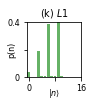

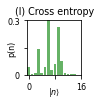

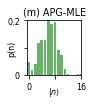

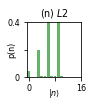

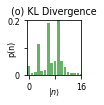

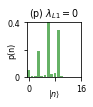

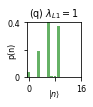

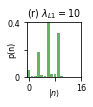

In [83]:
for letter, key in zip(["k", "l", "m", "n", "o", "p", "q", "r"],
                       ['states-L1', 'states-cross-entropy', 'states_apg_mle', 'states-L2', 'states-KL',
                        'states-gan_l1_0', 'states-gan_l1_1', 'states-gan_l1_10']):
    rho_reconstructed = Qobj(states_dict[key][0][-1])
    print(rho_reconstructed.tr())
    fig, ax = plot_fock(rho_reconstructed)
    ax.set_title("({})".format(letter)+r" {}".format(labels[key]))
    plt.savefig(figpath+"fig-12-{}-rho.pdf".format(letter), bbox_inches="tight", pad_inches=0.001)

In [ ]:
rho, _ = binomial(hilbert_size, 2, 4, 0)

fig, ax = plt.subplots(1, 1, figsize=(2*fig_width/5, 2*fig_width/5))
    
plot_fock_distribution(rho, ax=ax)
ax.set_aspect(aspect)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticks([0, 0.25, 0.5])
ax.set_yticklabels([0, "", 0.5])
ax.set_xticks([0, 6, 12])
ax.set_xlim(0, xlim)
ax.set_ylim(0, 0.5)
plt.savefig(figpath+"fig-10-binomial-data-fock.pdf")

In [ ]:
hinton(rho)

In [ ]:
for key in keys:
    hinton(states_dict[key])
    plt.title(key)
    plt.show()

In [ ]:
xlim = 16
aspect = 25
    
for key in keys:
    rho_reconstructed = states_dict[key]
    fig, ax = plt.subplots(1, 1, figsize=(2*fig_width/5, 2*fig_width/5))
    
    plot_fock_distribution(rho_reconstructed, ax=ax)
    ax.set_aspect(aspect)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_yticks([0, 0.25, 0.5])
    ax.set_yticklabels([0, "", 0.5])
    ax.set_xticks([0, 6, 12])
    ax.set_xlim(0, xlim)
    ax.set_ylim(0, 0.5)
    
    plt.title(labels[key])
    plt.savefig(figpath+"fig-10-{}-binomial-fock.pdf".format(key),
                pad_inches=0)    
    # plt.show()

In [ ]:
# figpath = "figures/"

# fig, axes = plt.subplots(1, 5, figsize=(2*fig_width, 0.35*fig_height), dpi=120, facecolor="white",
#                              sharey=True, sharex=True)

# rho, _ = binomial(hilbert_size, 2, 4, 0)
# rho_tf = dm_to_tf([rho])
# q = batched_expect(ops_batch, rho_tf)
# q = tf.keras.layers.GaussianNoise(0.015030995770693008)(q, training=True)
# q = q.numpy().reshape((32, 32))

# axes[0].pcolor(xvec, yvec, q/np.max(q), cmap="hot")
# axes[0].set_aspect("equal")


# for i in range(1, 4):
#     rho_reconst = Qobj(states[i][-1])
    
#     rho_tf = dm_to_tf([rho_reconst])
#     q = batched_expect(ops_batch, rho_tf)
#     q = q.numpy().reshape((32, 32))

#     axes[i].pcolor(xvec, yvec, q/np.max(q), cmap="hot", vmin=0, vmax=1)
#     axes[i].set_aspect("equal")
#     axes[i].set_xticklabels(["", "", ""])
#     axes[i].set_yticklabels(["-5", "", "5"])
    
# rho_reconst = Qobj(states[-1][-1])    
# rho_tf = dm_to_tf([rho_reconst])
# q = batched_expect(ops_batch, rho_tf)
# q = q.numpy().reshape((32, 32))

# im = axes[4].pcolor(xvec, yvec, q/np.max(q), cmap="hot", vmin=0, vmax=1)
# axes[4].set_aspect("equal")

# axes[0].set_title("Data")
# axes[1].set_title("Cross \nentropy")
# axes[2].set_title("L1")
# axes[3].set_title("L2")
# axes[4].set_title("QST-CGAN \n"+r"($\lambda_{L1} = 100$)")

# plt.subplots_adjust(wspace=-.6)
# cbar = fig.colorbar(im, ax=axes.ravel().tolist(), pad=0.01)
# cbar.ax.set_yticklabels(["0", "0.5", "1"])

# # axes[0].set_ylabel(r"$Im(\beta)$", labelpad=-9)
# plt.suptitle("(a) Reconstruction (with additive gaussian noise)", x = 0.55,y=1.6)
# # plt.savefig(figpath+"fig-10a-reconstructions.pdf", bbox_inches="tight", pad_inches=0)

In [ ]:
# figpath = "figures/"

# fig, axes = plt.subplots(1, 5, figsize=(2*fig_width, 0.35*fig_height), dpi=120, facecolor="white",
#                              sharey=True, sharex=True)

# rho, _ = binomial(hilbert_size, 2, 4, 0)

# cmap = "RdBu"

# w = wigner(rho, xvec, yvec)
# axes[0].pcolor(xvec, yvec, w, cmap=cmap)
# axes[0].set_aspect("equal")

# for i in range(1,4):
#     rho_reconst = Qobj(states[i][-1])
    
#     w = wigner(rho_reconst, xvec, yvec)
    
#     norm = colors.DivergingNorm(vmin = -np.max(w), vcenter=0, vmax=np.max(w))
#     im = axes[i].pcolor(xvec, yvec, w, cmap=cmap, norm=norm)
#     axes[i].set_aspect("equal")
#     axes[i].set_xticklabels(["", "", ""])
#     axes[i].set_yticklabels(["-5", "", "5"])
    
# rho_reconst = Qobj(states[-1][-1])    
# w = wigner(rho_reconst, xvec, yvec)


# norm = colors.DivergingNorm(vmin = -np.max(w), vcenter=0, vmax=np.max(w))
# axes[4].pcolor(xvec, yvec, w, cmap=cmap, norm=norm)
# axes[4].set_aspect("equal")

# # axes[0].set_title("Data")
# # axes[1].set_title("Cross \nentropy")
# # axes[2].set_title("L1")
# # axes[3].set_title("L2")
# # axes[4].set_title("QST-CGAN \n"+r"($\lambda_{L1} = 10$)")

# plt.subplots_adjust(wspace=-.6)
# cbar = fig.colorbar(im, ax=axes.ravel().tolist(), pad=0.01, ticks=[-0.1, 0, 0.1])
# cbar.ax.set_yticklabels(["-.1", "0", ".1"])

# axes[0].set_ylabel(r"$Im(\beta)$", labelpad=-9)
# for i in range(len(axes)):
#     axes[i].set_xlabel(r"$Re(\beta)$", labelpad=-1)


# plt.suptitle("(b) Wigner functions", y=1.15, x=0.55)
# # plt.savefig(figpath+"fig-10b-photon.pdf", bbox_inches="tight", pad_inches=0)

In [ ]:
# figpath = "figures/"

# fig, axes = plt.subplots(1, 5, figsize=(2*fig_width, 0.35*fig_height), dpi=120, facecolor="white",
#                              sharey=True, sharex=True)

# rho, _ = binomial(hilbert_size, 2, 4, 0)


# cmap = "RdBu"

# xlim = 16
# aspect = 22
# plot_fock_distribution(rho, ax=axes[0])
# axes[0].set_aspect(aspect)
# axes[0].set_xlabel("")
# axes[0].set_ylabel("")

# axes[0].set_xlim(0, xlim)    
# axes[0].set_ylim(0, 0.5)
# axes[0].set_yticklabels([0, 0.5])

# axes[0].set_yticks([0, 0.5])
# axes[0].set_xticks([0, 6, 12])

# for i in range(1,4):
#     rho_reconst = Qobj(states[i][-1])
    
#     plot_fock_distribution(rho_reconst, ax=axes[i])
#     axes[i].set_aspect(aspect)
#     axes[i].set_xlabel("")
#     axes[i].set_ylabel("")
#     axes[i].set_ylim(0, 0.5)
#     axes[i].set_xlim(0, xlim)    
#     axes[i].set_xlabel(r"$|n\rangle$", fontsize=9)
#     # axes[i].set_xticklabels(["", "", ""])
#     # axes[i].set_yticklabels(["-5", "", "5"])
    
# rho_reconst = Qobj(states[7][-1])    
# plot_fock_distribution(rho, ax=axes[4])
# axes[4].set_aspect(aspect)
# axes[4].set_xlabel("")
# axes[4].set_ylabel("")

# axes[4].set_xlim(0, xlim)
# axes[4].set_ylim(0, 0.5)
# axes[i].set_xlabel(r"$|n\rangle$", fontsize=9)
# # axes[0].set_title("Data")
# # axes[1].set_title("Cross \nentropy")
# # axes[2].set_title("L1")
# # axes[3].set_title("L2")
# # axes[4].set_title("QST-CGAN \n"+r"($\lambda_{L1} = 10$)")

# plt.subplots_adjust(wspace=-0.56, right=0.80)
# axes[0].set_ylabel("p(n)", fontsize=9, labelpad=-8)
# axes[0].set_xlabel(r"$|n\rangle$", fontsize=9)
# # plt.tight_layout()

# # axes[0].set_ylabel(r"$Im(\beta)$", labelpad=-9)
# # for i in range(len(axes)):
# #     axes[i].set_xlabel(r"$Re(\beta)$", labelpad=-1)